In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("StudentsPerformance.csv")
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       20 non-null     str  
 1   race/ethnicity               20 non-null     str  
 2   parental_level_of_education  20 non-null     str  
 3   lunch                        20 non-null     str  
 4   test_preparation_course      20 non-null     str  
 5   math_score                   20 non-null     int64
 6   reading_score                20 non-null     int64
 7   writing_score                20 non-null     int64
dtypes: int64(3), str(5)
memory usage: 1.4 KB


,math_score,reading_score,writing_score
count,20.000000,20.000000,20.000000
mean,63.150000,69.600000,66.550000
std,18.644246,18.077028,19.261292
min,29.000000,34.000000,34.000000
25%,47.000000,56.500000,51.500000
50%,67.000000,68.000000,68.500000
75%,76.500000,84.750000,80.500000
max,90.000000,95.000000,96.000000


In [3]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
#Apakah perempuan memiliki nilai membaca lebih tinggi daripada laki-laki?
df.groupby("gender")[["reading_score"]].mean()



,reading_score
gender,
female,73.50
male,63.75


<Axes: ylabel='Frequency'>

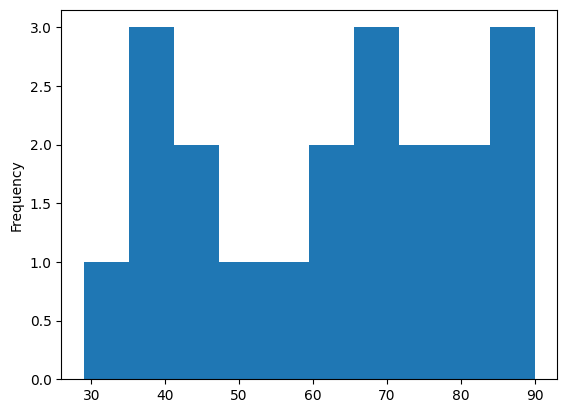

In [5]:
#Bagaimana distribusi nilai matematika?
df["math_score"].plot.hist()

In [6]:
#Apakah ada hubungan antara parental education dan skor siswa?
df.groupby("parental_level_of_education")[["math_score","reading_score","writing_score"]].mean()

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,61.000000,64.800000,59.400000
bachelor's degree,72.000000,72.000000,74.000000
high school,43.666667,52.666667,50.333333
master's degree,86.000000,94.000000,94.500000
some college,64.777778,72.222222,68.888889


In [7]:
#Siswa dari ras/etnis mana yang memiliki nilai rata-rata tertinggi?
df.groupby("race/ethnicity")[["math_score"]].mean()

,math_score
race/ethnicity,
group A,47.000000
group B,63.714286
group C,67.333333
group D,67.400000
group E,29.000000


In [8]:
#Apakah siswa yang ikut kursus persiapan ujian memiliki nilai lebih tinggi?
df.groupby("test_preparation_course")[["math_score"]].mean()

,math_score
test_preparation_course,
completed,66.500000
none,62.777778


<Axes: ylabel='Frequency'>

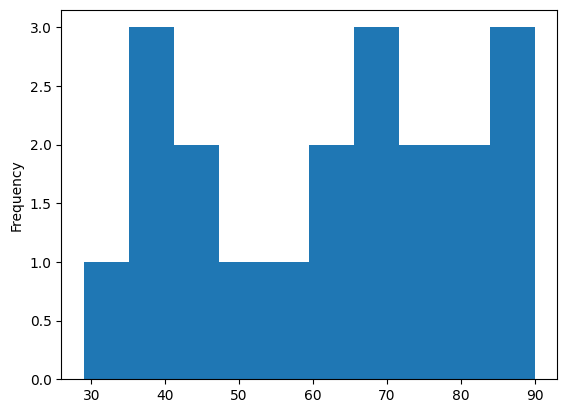

In [9]:
#Histogram – untuk melihat distribusi
df["math_score"].plot.hist()

<Axes: xlabel='race/ethnicity'>

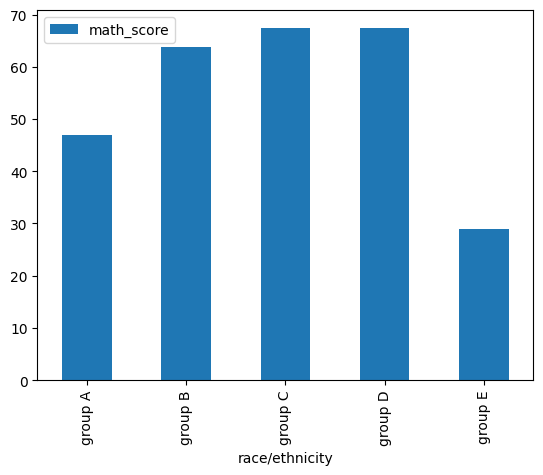

In [10]:
#Bar chart – untuk membandingkan rata-rata antar kelompok
df.groupby("race/ethnicity")[["math_score"]].mean().plot(kind="bar")

<Axes: title={'center': 'math_score'}, xlabel='race/ethnicity'>

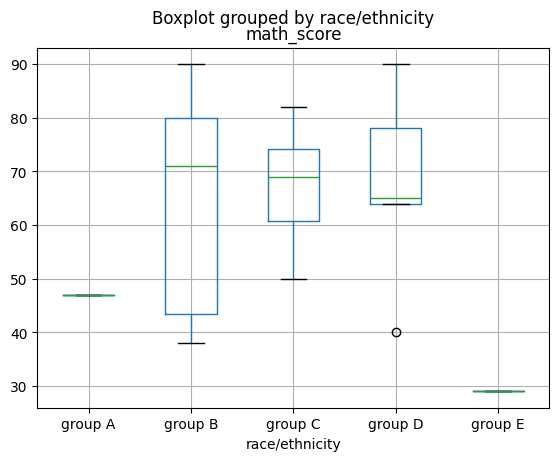

In [17]:
#Boxplot – untuk melihat persebaran (min, max, quartile)
df.boxplot("math_score", by= "race/ethnicity")